## <center> LINEAR AND PLOYNOMIAL REGRESSION

In [307]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preparation

In [309]:
# Loading the Car Price Dataset
df = pd.read_csv('car_price_dataset (1).csv')

In [310]:
df.head() # first five records

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price in $
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [311]:
df.shape  #to understand the shape

(205, 16)

In [312]:
#statistical description of Dataset
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price in $
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.709756
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.851862
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [313]:
# To get basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price in $        205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [314]:
#checking for missing values
df.isnull().sum()

car_ID              0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price in $          0
dtype: int64

In [315]:
# Removed the feature "car_ID"
df = df.drop('car_ID',axis = 1)

In [316]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price in $
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [317]:
# Separate the Dataset into X features and y feature
X = df.drop('price in $', axis = 1)
y = df['price in $']

In [318]:
#identifying the shape of X features and y variable
X.shape, y.shape

((205, 14), (205,))

### Task 2: Data Analysis

<Axes: >

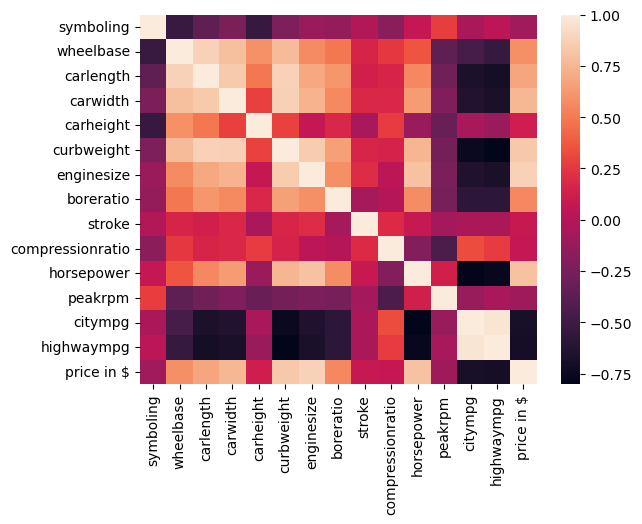

In [320]:
# Identifying the correlations among the features and target variable
sns.heatmap(df.corr())

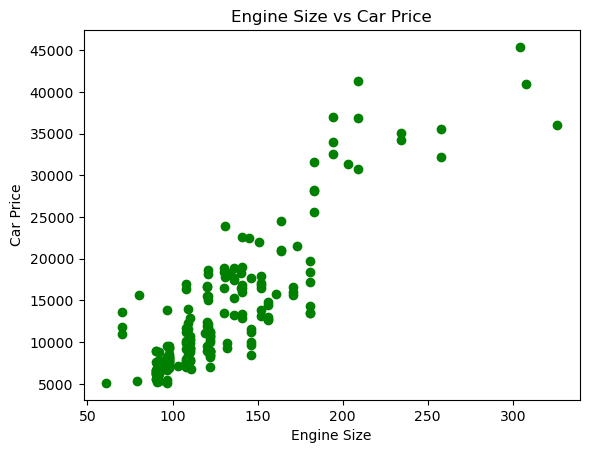

In [321]:
#Scatter plot between ENGINE SIZE and PRICE
plt.figure()
plt.scatter(df['enginesize'], df['price in $'], color='green')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs Car Price')
plt.show()

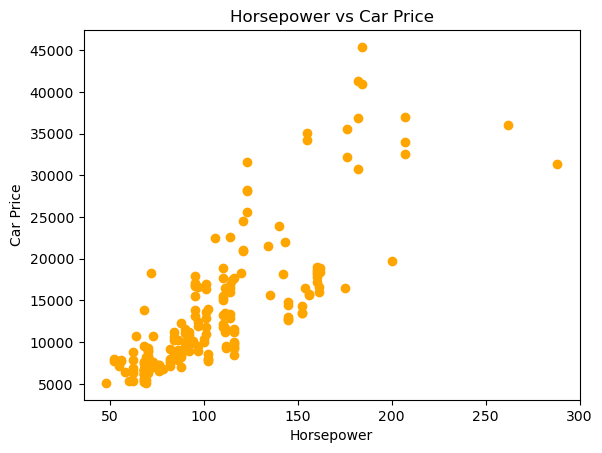

In [322]:
#Scatter plot between HORSE POWER and PRICE
plt.figure()
plt.scatter(df['horsepower'], df['price in $'], color='orange')
plt.xlabel('Horsepower')
plt.ylabel('Car Price')
plt.title('Horsepower vs Car Price')
plt.show()

### Task 3: Train Test Split

In [324]:
#Data Splitting into Train and Test
from sklearn.model_selection import train_test_split

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state = 42) 

### Task 4: Linear Regression Model

In [327]:
from sklearn.linear_model import LinearRegression

In [328]:
# Linear Regression
model = LinearRegression()

In [329]:
model.fit(X_train,y_train)

LinearRegression()

In [330]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [331]:
y_pred_train[:5]

array([14211.37325725, 18213.9280643 ,  5907.86635821,  6390.11481119,
       10276.86197986])

In [332]:
y_pred_test[:5]

array([26985.71739553, 16995.7555088 , 10411.0786761 , 14813.77854885,
       25159.10426471])

In [333]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [334]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
f"Training MSE :{mse_train}    Testing MSE :{mse_train}"

'Training MSE :8477376.468057923    Testing MSE :8477376.468057923'

In [335]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
f"Training RMSE :{rmse_train}    Testing RMSE :{rmse_test}"

'Training RMSE :2911.5934585820737    Testing RMSE :3789.1980792753043'

In [336]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
f"Training R2 :{r2_train}    Testing R2 :{r2_test}"

'Training R2 :0.8578523829898763    Testing R2 :0.8181239263278439'

### Task 5: Polynomial Regression Model

In [338]:
from sklearn.preprocessing import PolynomialFeatures

In [339]:
poly_features = PolynomialFeatures(degree = 2,include_bias=False)

In [340]:
X_poly_train = poly_features.fit_transform(X_train) # Polynomial Features for Train Data

In [341]:
X_poly_test = poly_features.transform(X_test)# Polynomial Features for Test Data

In [342]:
X_poly_train.shape, X_poly_test.shape,y_train.shape, y_test.shape

((164, 119), (41, 119), (164,), (41,))

In [343]:
# Polynomial Regression
poly_model = LinearRegression()

In [344]:
poly_model.fit(X_poly_train,y_train)

LinearRegression()

In [345]:
# Model Predictions
y_poly_pred_test = poly_model.predict(X_poly_test) # prediction made using test data
y_poly_pred_train = poly_model.predict(X_poly_train) #prediction made using train data

In [346]:
# RMSE  
poly_rmse_test = np.sqrt(mean_squared_error(y_test,y_poly_pred_test)) # test Prediction
poly_rsme_train = np.sqrt(mean_squared_error(y_train,y_poly_pred_train)) # train prediction
f"Training RMSE :{poly_rsme_train}    Testing RMSE :{poly_rmse_test}"

'Training RMSE :708.058998578887    Testing RMSE :12323.226379271417'

In [347]:
# R2 Score
poly_r2_test = r2_score(y_test,y_poly_pred_test) #test prediction
poly_r2_train = r2_score(y_train,y_poly_pred_train) #train prediction
f"Training R2 :{poly_r2_train}    Testing R2 :{poly_r2_test}"

'Training R2 :0.991593465366231    Testing R2 :-0.9236666079523359'

### Task 6: Model Comparison

In [349]:
print("Linear Regression Model:")
# RMSE values of Training and Testing data in Linear Regression
print(f"Training Data RMSE: {rmse_train}")
print(f"Testing Data RMSE: {rmse_test}")
# R2 values of Training and Testing Data in Linear Regression
print(f"Training Data R2: {r2_train}")
print(f"Testing Data R2: {r2_test}")
print("-------------------------------------")
print("Polynomial Regression Model:")
# RMSE values of Training and Testing data in Polynomial Regression
print(f"Training Data RMSE: {poly_rsme_train}")
print(f"Testing Data RMSE: {poly_rmse_test}")
# R2 values of Training and Testing Data in Linear Regression
print(f"Training Data R2: {poly_r2_train}")
print(f"Testing Data R2: {poly_r2_test}")

Linear Regression Model:
Training Data RMSE: 2911.5934585820737
Testing Data RMSE: 3789.1980792753043
Training Data R2: 0.8578523829898763
Testing Data R2: 0.8181239263278439
-------------------------------------
Polynomial Regression Model:
Training Data RMSE: 708.058998578887
Testing Data RMSE: 12323.226379271417
Training Data R2: 0.991593465366231
Testing Data R2: -0.9236666079523359


The Linear Regression model is better. Its testing R² value is approximately 0.82, indicating that it is able to explain most of the variations in the data and that it is a good model for new data.

The Polynomial model has a very high training R² but a negative testing R², meaning that it is overfitting and not able to generalize well.

Linear Regression is the better model.